In [1]:
import pandas as pd 
from prettytable import PrettyTable  
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath('C:/Users/teeyob/Rossmann_Sales_Forecasting/scripts'))

In [2]:
test=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/test.csv')
train=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/train.csv')
store=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/store.csv')

C:\Users\teeyob\AppData\Local\Temp\ipykernel_23524\1489791278.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/train.csv')


In [16]:
train_store_merged = pd.merge(train, store, on='Store', how='left')
train_store_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [4]:
from Retail_Sales_Data_Preprocessing_Pipeline import preprocess_data
processed_df=preprocess_data(train_store_merged)
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 33 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  int64  
 3   Customers                       1017209 non-null  int64  
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   CompetitionDistance             1017209 non-null  float64
 8   CompetitionOpenSinceMonth       1017209 non-null  float64
 9   CompetitionOpenSinceYear        1017209 non-null  float64
 10  Promo2                          1017209 non-null  int64  
 11  Promo2SinceWeek                 1017209 non-null  float64
 12  

In [6]:
from tree_based_models import prepare_data,evaluate_models_with_cv

results, rf_model = evaluate_models_with_cv(processed_df)

table = PrettyTable()
table.field_names = ["Model", "Root Mean Squared Error", "Mean Squared Error", "R^2 Score"]

for model, metrics in results.items():
    table.add_row([model, metrics['Root Mean Squared Error'], metrics['Mean Squared Error'], metrics['R^2 Score']])

print(table)


X_train, X_test, y_train, y_test = prepare_data(processed_df)
y_pred = rf_model.predict(X_test)


import pandas as pd

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison_df.sample(10))


+---------------------------+-------------------------+--------------------+-----------+
|           Model           | Root Mean Squared Error | Mean Squared Error | R^2 Score |
+---------------------------+-------------------------+--------------------+-----------+
|   DecisionTreeRegressor   |          661.35         |     437389.39      |    0.97   |
|      BaggingRegressor     |          487.85         |     238001.89      |    0.98   |
|   RandomForestRegressor   |          487.47         |     237629.51      |    0.98   |
| GradientBoostingRegressor |          950.89         |     904197.21      |    0.94   |
+---------------------------+-------------------------+--------------------+-----------+
        Actual  Predicted
314601    4146     4346.6
12225     2996     2904.9
242486       0        0.0
359065    6896     6839.4
128163    5065     4520.4
826529    6519     7034.7
681399    4228     4632.7
287672    7708     6951.9
49206     9527     8977.7
35412    13091     8899.6


In [8]:
from model_evaluation_and_hyperparameter_optimization import evaluate_random_forest_with_cv1
results = evaluate_random_forest_with_cv1(processed_df)  # Expect only results, no model

from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Value"]

for metric, value in results.items():
    table.add_row([metric, value])

print(table)


+-------------------------+--------------------------------------------------------------------------------------+
|          Metric         |                                        Value                                         |
+-------------------------+--------------------------------------------------------------------------------------+
|    Mean Squared Error   |                                      875803.73                                       |
| Root Mean Squared Error |                                        935.84                                        |
|        R^2 Score        |                                         0.94                                         |
|     Best Parameters     | {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} |
+-------------------------+--------------------------------------------------------------------------------------+


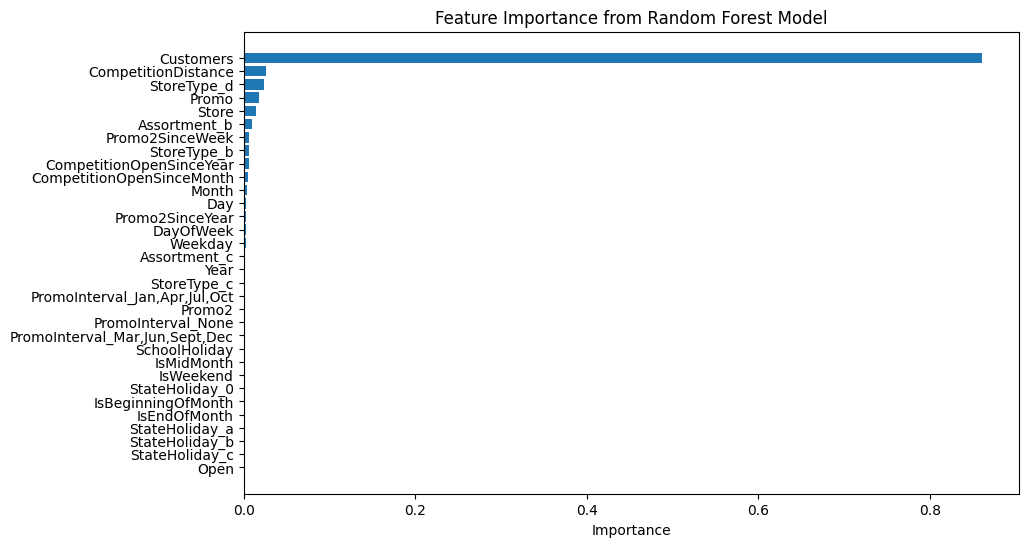

In [9]:


def plot_feature_importance(rf_model, feature_names):
    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance from Random Forest Model')
    plt.gca().invert_yaxis()  
    plt.show()
feature_names = processed_df.drop(columns='Sales').columns  
plot_feature_importance(rf_model, feature_names)


In [10]:
def display_feature_importance(rf_model, feature_names):
    
    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    print(feature_importance_df)
feature_names = processed_df.drop(columns='Sales').columns  
display_feature_importance(rf_model, feature_names)


                           Feature  Importance
2                        Customers    0.860635
6              CompetitionDistance    0.026388
26                     StoreType_d    0.023832
4                            Promo    0.017560
0                            Store    0.014611
27                    Assortment_b    0.009687
10                 Promo2SinceWeek    0.006389
24                     StoreType_b    0.006326
8         CompetitionOpenSinceYear    0.005868
7        CompetitionOpenSinceMonth    0.005196
14                           Month    0.003418
16                             Day    0.003076
11                 Promo2SinceYear    0.003038
1                        DayOfWeek    0.002741
12                         Weekday    0.002559
28                    Assortment_c    0.002142
15                            Year    0.001499
25                     StoreType_c    0.001082
29   PromoInterval_Jan,Apr,Jul,Oct    0.001031
9                           Promo2    0.000512
31           

In [11]:
import joblib
from datetime import datetime

def save_model_with_timestamp(model):
 
    timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")
    filename = f"model_{timestamp}.pkl"
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")




save_model_with_timestamp(rf_model)


Model saved as model_24-09-2024-07-29-59-293895.pkl
